# Example: Applying L-S Periodogram Analysis to Ocean Color Data

Follows documentation in https://docs.astropy.org/en/stable/timeseries/index.html and https://docs.astropy.org/en/stable/timeseries/lombscargle.html, but applied to Ocean Color (OC) data. 

*The steps outlined are analgous to those detailed Blocker et al. 2005, but with with differences in figure formatting and the treatment of leap years. 

Import Packages

In [4]:
import numpy as np
import pandas as pd
from astropy.timeseries import LombScargle
from astropy.timeseries import TimeSeries
from astropy import units as u
import matplotlib.pyplot as plt

## Load Validation Data as pandas dataframe and set index to datetime

NASA Ocean Color Validation Data can also be downloaded from:
https://seabass.gsfc.nasa.gov/search#val

In [5]:
ModisA_Moby_df=pd.read_csv('DATA/ModisA_Moby.csv',header=33,skiprows=(35,34))
ModisA_Moby_df['date_time']=pd.to_datetime(ModisA_Moby_df['date_time'],format='%Y-%m-%d %H:%M:%S')
ModisA_Moby_df=ModisA_Moby_df.set_index('date_time')

Make $\Delta R_{rs}(\lambda)$ column

In [7]:
ModisA_Moby_df['Delta_rrs412']=ModisA_Moby_df['aqua_rrs412']-ModisA_Moby_df['insitu_rrs412']

## Convert pandas df to an astropy TimeSeries

In [8]:
ModisA_Moby_TS=TimeSeries.from_pandas(ModisA_Moby_df)

## Plot Modis-Aqua solar zenith angle versus time. 

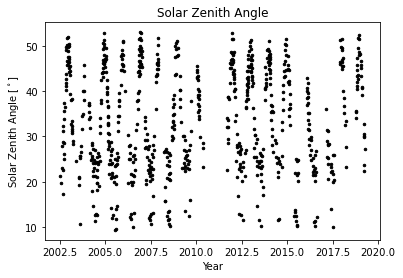

In [9]:
plt.plot(ModisA_Moby_TS.time.decimalyear,ModisA_Moby_TS['aqua_solz'], 'k.', markersize=5)
plt.title('Solar Zenith Angle')
plt.xlabel('Year')
plt.ylabel('Solar Zenith Angle [$^\circ$]')
plt.show()

A Periodicity clearly exist

## Plot $\Delta\ R_{rs}(\lambda)$, Modis-Aqua $R_{rs}(\lambda)$, and MOBY $R_{rs}(\lambda)$ versus time

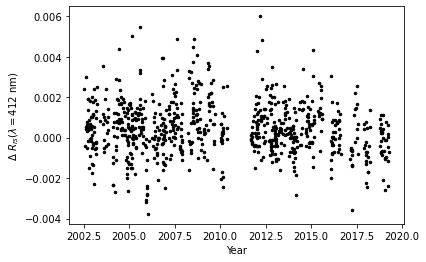

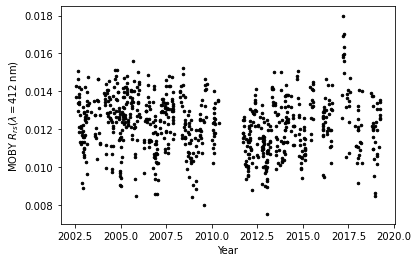

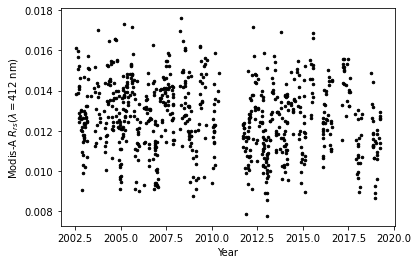

In [10]:
plt.plot(ModisA_Moby_TS.time.decimalyear, ModisA_Moby_TS['Delta_rrs412'], 'k.', markersize=5)
plt.xlabel('Year')
plt.ylabel('$\Delta\ R_{rs}(\lambda=412\ \mathrm{nm})$')
plt.show()

plt.plot(ModisA_Moby_TS.time.decimalyear,ModisA_Moby_TS['insitu_rrs412'], 'k.', markersize=5)
plt.xlabel('Year')
plt.ylabel('MOBY $R_{rs}(\lambda=412\ \mathrm{nm})$')
plt.show()

plt.plot(ModisA_Moby_TS.time.decimalyear, ModisA_Moby_TS['aqua_rrs412'], 'k.', markersize=5)
plt.xlabel('Year')
plt.ylabel('Modis-A $R_{rs}(\lambda=412\ \mathrm{nm})$')
plt.show()

Unlike SZA versus time (and to a lesser extent the $R_{rs}(\lambda)$ time series), the periodicity the $\Delta R_{rs}(\lambda)$ time series is hader to determine from the scatter plots

## Generate Lombscargle Peridoogram Using TimeSeries data

Specify Parameters in L-S Periodogram Generation (see https://docs.astropy.org/en/stable/timeseries/lombscargle.html for descriptions)

In [11]:
ls_nterms=1
ls_normalization_scheme='standard'
ls_method='cython'
ls_samples_per_peak=50
FAP_probability=[0.01]
FAP_method='bootstrap'
uncertainty=np.std(ModisA_Moby_TS['aqua_rrs412']-ModisA_Moby_TS['insitu_rrs412'])

Generate L-S Periodogram

In [12]:
MODISA_MOBY_SZA_LS=LombScargle.from_timeseries(ModisA_Moby_TS,'aqua_solz',nterms=ls_nterms,normalization=ls_normalization_scheme)
frequency, power = MODISA_MOBY_SZA_LS.autopower(minimum_frequency=1/(365.25*2.5)*(1/u.day),maximum_frequency=1/(7)*(1/u.day),samples_per_peak=ls_samples_per_peak,method=ls_method) 

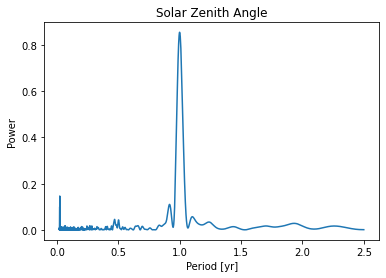

In [19]:
plt.plot((1/frequency)/365.25, power)
plt.xlabel('Period [yr]')
plt.ylabel('Power')
plt.title('Solar Zenith Angle')
plt.show()

Generate Perdiograms for $R_{rs}(\lambda)$

In [14]:
MODISA_MOBY_DeltaRrs412_LS=LombScargle.from_timeseries(ModisA_Moby_TS,'Delta_rrs412',uncertainty,nterms=ls_nterms,normalization=ls_normalization_scheme)
MODISA_MOBY_AquaRrs412_LS=LombScargle.from_timeseries(ModisA_Moby_TS,'aqua_rrs412',0.5*uncertainty,nterms=ls_nterms,normalization=ls_normalization_scheme)
MODISA_MOBY_MobyRrs412_LS=LombScargle.from_timeseries(ModisA_Moby_TS,'insitu_rrs412',0.5*uncertainty,nterms=ls_nterms,normalization=ls_normalization_scheme)

DeltaRrs412_frequency, DeltaRrs412_power = MODISA_MOBY_DeltaRrs412_LS.autopower(minimum_frequency=1/(365.25*2.5)*(1/u.day),maximum_frequency=1/(7)*(1/u.day),samples_per_peak=ls_samples_per_peak,method=ls_method) 
AquaRrs412_frequency, AquaRrs412_power = MODISA_MOBY_AquaRrs412_LS.autopower(minimum_frequency=1/(365.25*2.5)*(1/u.day),maximum_frequency=1/(7)*(1/u.day),samples_per_peak=ls_samples_per_peak,method=ls_method) 
MobyRrs412_frequency, MobyRrs412_power = MODISA_MOBY_MobyRrs412_LS.autopower(minimum_frequency=1/(365.25*2.5)*(1/u.day),maximum_frequency=1/(7)*(1/u.day),samples_per_peak=ls_samples_per_peak,method=ls_method) 

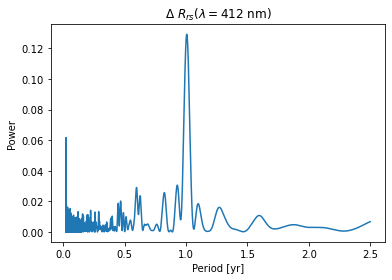

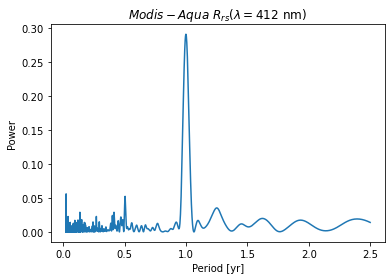

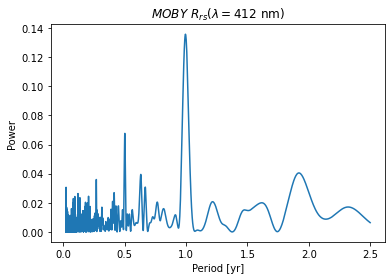

In [214]:
plt.plot((1/DeltaRrs412_frequency)/365.25, DeltaRrs412_power)
plt.xlabel('Period [yr]')
plt.ylabel('Power')
plt.title('$\Delta\ R_{rs}(\lambda=412\ \mathrm{nm})$')
plt.show()

plt.plot((1/AquaRrs412_frequency)/365.25, AquaRrs412_power)
plt.xlabel('Period [yr]')
plt.ylabel('Power')
plt.title('$Modis-Aqua\ R_{rs}(\lambda=412\ \mathrm{nm})$')
plt.show()

plt.plot((1/MobyRrs412_frequency)/365.25, MobyRrs412_power)
plt.xlabel('Period [yr]')
plt.ylabel('Power')
plt.title('$MOBY\ R_{rs}(\lambda=412\ \mathrm{nm})$')
plt.show()

Find "best"  Frequency

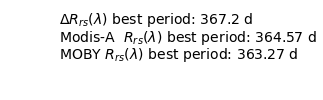

In [80]:
best_DeltaRrs412_frequency = frequency[np.argmax(DeltaRrs412_power)]
best_AquaRrs412_frequency = frequency[np.argmax(AquaRrs412_power)]
best_MobyRrs412_frequency = frequency[np.argmax(MobyRrs412_power)]

# use matplotlib just to render latex 
ax=plt.axes([0,0,0.3,0.3])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.text(0.4,0.8,r'$\Delta R_{rs}(\lambda)$ best period: '+str(np.round(1/best_DeltaRrs412_frequency,2)),size=14)
ax.text(0.4,0.6,r'Modis-A  $R_{rs}(\lambda)$ best period: '+str(np.round(1/best_AquaRrs412_frequency,2)),size=14)
ax.text(0.4,0.4,r'MOBY $R_{rs}(\lambda)$ best period: '+str(np.round(1/best_MobyRrs412_frequency,2)),size=14)
# plt.text(r"$\Delta R_{rs}(\lamnda)$ best period: '"+str(1/best_DeltaRrs412_frequency))
# print(r"Modis-A $R_{rs}(\lamnda)$ best period: "+str(1/best_AquaRrs412_frequency))
# print(r"MOBY $R_{rs}(\lamnda)$ best period: "+str(1/best_MobyRrs412_frequency))
plt.show()
# print(r"hi +$\Delta$")


The "best" periods are all close to the annual period ($\sim 365.25$ days) which is within the precision uncertainity when the width of the peaks are considered. 

## A more useful metric for computing the uncertnaity associated with the peak is the false alarm probablity (FAP)

In [167]:
print('FAPs:')
# Get power at period closest to the annual period
periods=1/DeltaRrs412_frequency
Annual_Power=DeltaRrs412_power[np.argmin([abs(x.value-365.25) for x in periods])]
# Calculate Fap at annual period's power
FAP=MODISA_MOBY_DeltaRrs412_LS.false_alarm_probability(Annual_Power,method='bootstrap')
print(FAP)

# Get power at period closest to the annual period
periods=1/AquaRrs412_frequency
Annual_Power=AquaRrs412_power[np.argmin([abs(x.value-365.25) for x in periods])]
# Calculate Fap at annual period's power
FAP=MODISA_MOBY_AquaRrs412_LS.false_alarm_probability(Annual_Power,method='bootstrap')
print(FAP)

# Get power at period closest to the annual period
periods=1/MobyRrs412_frequency
Annual_Power=MobyRrs412_power[np.argmin([abs(x.value-365.25) for x in periods])]
# Calculate Fap at annual period's power
FAP=MODISA_MOBY_MobyRrs412_LS.false_alarm_probability(Annual_Power,method='bootstrap')
print(FAP)

print('The FAPs at the annual period for for all the time series are 0.0, strongly indicating that the annual frequency is contained in the time series')


FAPs:
0.0
0.0
0.0
The FAPs at the annual period for for all the time series are 0.0, strongly indicating that the annual frequency is contained in the time series


## Fold Time Series to Annual Frequency 

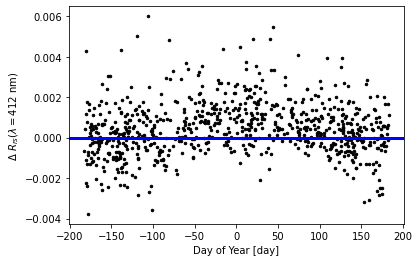

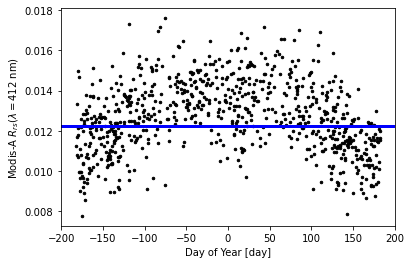

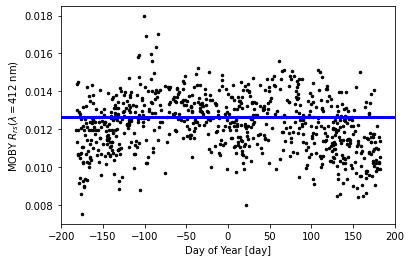

In [169]:
# Folding time series to the annual peridocity. A day in the middle of the year is chosen so that
# the x-axis begins with Jan 1st (-182.56 days) and ends with Dec 31st (182.5).
ModisA_Moby_Folded_TS = ModisA_Moby_TS.fold(period=365.25 * u.day, epoch_time='2000-07-02')


plt.plot(ModisA_Moby_Folded_TS.time.jd, ModisA_Moby_Folded_TS['Delta_rrs412'], 'k.', markersize=5)
plt.xlabel('Day of Year [day]')
plt.ylabel('$\Delta\ R_{rs}(\lambda=412\ \mathrm{nm})$')
plt.axhline(y=0,color='b',linewidth=3)
plt.show()

plt.plot(ModisA_Moby_Folded_TS.time.jd, ModisA_Moby_Folded_TS['aqua_rrs412'], 'k.', markersize=5)
plt.xlabel('Day of Year [day]')
plt.ylabel('Modis-A $R_{rs}(\lambda=412\ \mathrm{nm})$')
plt.axhline(y=ModisA_Moby_Folded_TS['insitu_rrs412'].mean(),color='b',linewidth=3)
plt.show()

plt.plot(ModisA_Moby_Folded_TS.time.jd, ModisA_Moby_Folded_TS['insitu_rrs412'], 'k.', markersize=5)
plt.xlabel('Day of Year [day]')
plt.ylabel('MOBY $R_{rs}(\lambda=412\ \mathrm{nm})$')
plt.axhline(y=ModisA_Moby_Folded_TS['aqua_rrs412'].mean(),color='b',linewidth=3)
plt.show()



When folded, the annual perodicity is clearly contained in the time series